In [1]:
# Tiago Moreira Trocoli da Cunha
# number: 226078
# python 3

import cv2
import scipy as sp
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mat
import skimage as sk

# display all images
def display_images(images, scales):
    n = len(images)
    for i in range(n):
        plt.figure(figsize = scales[i])
        plt.imshow(images[i], cmap=cm.gray)
        plt.show()

# turn grascale image to binary one
def grayscale_to_binary(image):
    image = image/255
    image = np.where(image == 1.0, 0, 1).astype(np.uint8)
    return image

# turn binary image to grascale one
def binary_to_grayscale(image):
    image = image*255
    image = np.where(image == 255, 0, 255).astype(np.uint8)
    return image

# load original image
image   = cv2.imread("bitmap.pbm", 0)
# display it
display_images([image], [[10,10]])
image   = grayscale_to_binary(image)

<Figure size 1000x1000 with 1 Axes>

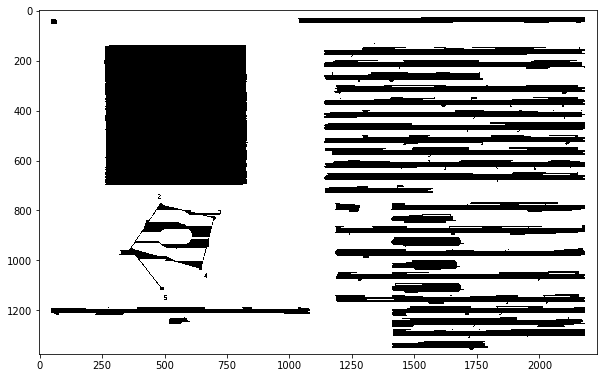

True

In [2]:
# 1), 2) dilatation and erosion (closing operation), struct 1x100
# structuring element
struct = np.ones((1,100),dtype=bool)
# apply dilatation
image_r1 = ndimage.binary_dilation(image, structure=struct).astype(np.uint8)
# apply erosion
image_r2 = ndimage.binary_erosion(image_r1, structure=struct).astype(np.uint8)
# convert to grayscale of 0 and 255
image_r2 = binary_to_grayscale(image_r2)
# show image
display_images([image_r2], [[10,10]])
# write to pbm
cv2.imwrite("image_r2.pbm", image_r2)

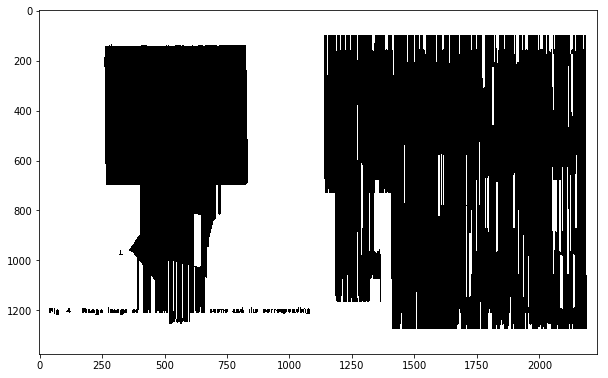

True

In [3]:
# 3), 4) dilatation and erosion (closing operation), struct 200x1

# structuring element
struct = np.ones((200,1),dtype=bool)
# apply dilatation
image_r3 = ndimage.binary_dilation(image, structure=struct).astype(np.uint8)
# apply erosion
image_r4 = ndimage.binary_erosion(image_r3, structure=struct).astype(np.uint8)
# convert to grayscale of 0 and 255
image_r4 = binary_to_grayscale(image_r4)
# show image
display_images([image_r4], [[10,10]])
# write to pbm
cv2.imwrite("image_r4.pbm", image_r4)

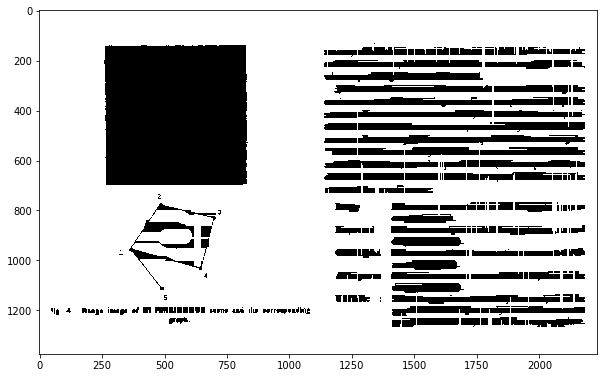

True

In [4]:
# 5) And operation
image_b2 = grayscale_to_binary(image_r2)
image_b4 = grayscale_to_binary(image_r4)
image_and = np.logical_and(image_b2, image_b4).astype(np.uint8)
image_and = binary_to_grayscale(image_and)
# show image
display_images([image_and], [[10,10]])
# write to pbm
cv2.imwrite("image_and.pbm", image_and)

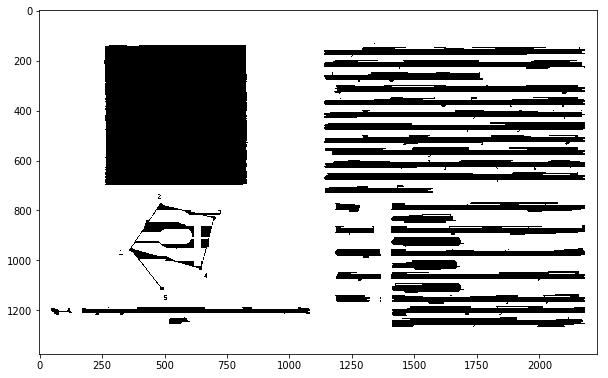

True

In [5]:
# 6) closing operation given structuring element 1x30
# structuring element
struct = np.ones((1,30),dtype=bool)
image_and_b = grayscale_to_binary(image_and)
# aply closing operation
image_r5 = ndimage.binary_closing(image_and_b, structure=struct).astype(np.uint8)
# convert to grayscale of 0 and 255
image_r5 = binary_to_grayscale(image_r5)
# show image
display_images([image_r5], [[10,10]])
# write to pbm
cv2.imwrite("image_r6.pbm", image_r5)

In [6]:
# 7)
image_r5_b = grayscale_to_binary(image_r5)
# find the connected component algorithm. 
labeled_array, num_components = ndimage.label(image_r5_b)
print("Number of connected components: ",num_components)

Number of connected components:  53


Component 1
Ratio of black pixels:  0.75
Total number of black pixels:  6
Number of horizontal transitions:  1.0
Number of vertical transitions:  1.0 



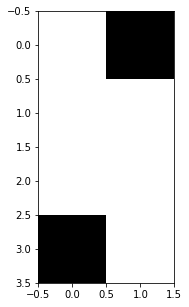

Component 2
Ratio of black pixels:  1.0
Total number of black pixels:  2
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



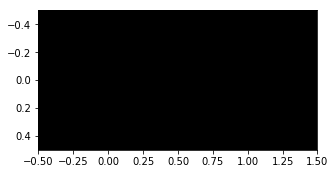

Component 3
Ratio of black pixels:  0.9755739669829973
Total number of black pixels:  315805
Number of horizontal transitions:  568.0
Number of vertical transitions:  1248.0 



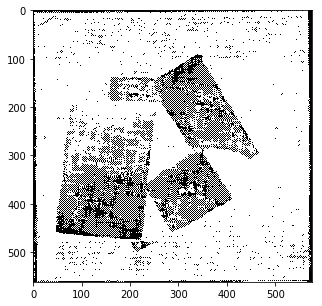

Component 4
Ratio of black pixels:  0.6226053639846744
Total number of black pixels:  26000
Number of horizontal transitions:  58.0
Number of vertical transitions:  1241.0 



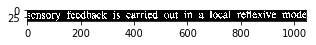

Component 5
Ratio of black pixels:  0.6617576628352491
Total number of black pixels:  27635
Number of horizontal transitions:  70.0
Number of vertical transitions:  986.0 



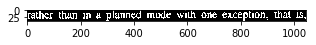

Component 6
Ratio of black pixels:  0.6612325403534195
Total number of black pixels:  16427
Number of horizontal transitions:  62.0
Number of vertical transitions:  649.0 



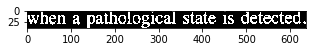

Component 7
Ratio of black pixels:  0.6906987434875881
Total number of black pixels:  27045
Number of horizontal transitions:  62.0
Number of vertical transitions:  959.0 



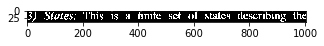

Component 8
Ratio of black pixels:  0.5974377394636016
Total number of black pixels:  24949
Number of horizontal transitions:  79.0
Number of vertical transitions:  1024.0 



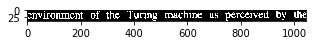

Component 9
Ratio of black pixels:  0.9
Total number of black pixels:  18
Number of horizontal transitions:  1.0
Number of vertical transitions:  0.0 



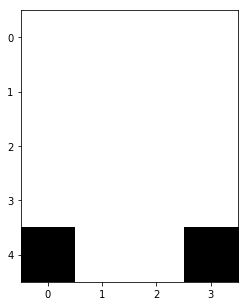

Component 10
Ratio of black pixels:  0.5886854668044688
Total number of black pixels:  23923
Number of horizontal transitions:  59.0
Number of vertical transitions:  1233.0 



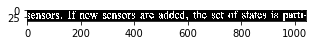

Component 11
Ratio of black pixels:  0.85
Total number of black pixels:  17
Number of horizontal transitions:  1.0
Number of vertical transitions:  2.0 



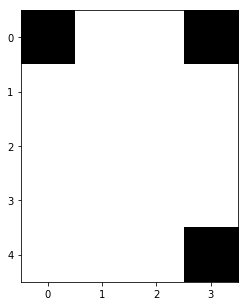

Component 12
Ratio of black pixels:  0.6605465004793863
Total number of black pixels:  27558
Number of horizontal transitions:  56.0
Number of vertical transitions:  1045.0 



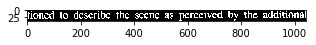

Component 13
Ratio of black pixels:  0.6011756238003839
Total number of black pixels:  25057
Number of horizontal transitions:  76.0
Number of vertical transitions:  1018.0 



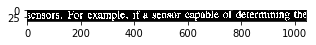

Component 14
Ratio of black pixels:  0.6679326923076923
Total number of black pixels:  27786
Number of horizontal transitions:  60.0
Number of vertical transitions:  1144.0 



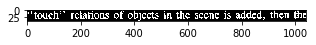

Component 15
Ratio of black pixels:  0.6311334219203701
Total number of black pixels:  25648
Number of horizontal transitions:  93.0
Number of vertical transitions:  1029.0 



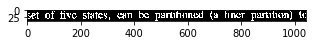

Component 16
Ratio of black pixels:  0.7264137014616862
Total number of black pixels:  29520
Number of horizontal transitions:  41.0
Number of vertical transitions:  1040.0 



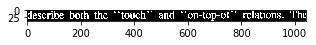

Component 17
Ratio of black pixels:  1.0
Total number of black pixels:  1
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



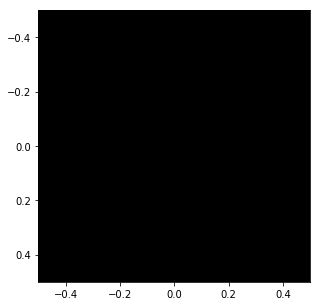

Component 18
Ratio of black pixels:  0.7408972932888395
Total number of black pixels:  9991
Number of horizontal transitions:  29.0
Number of vertical transitions:  465.0 



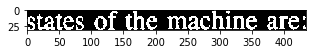

Component 19
Ratio of black pixels:  0.5083333333333333
Total number of black pixels:  122
Number of horizontal transitions:  14.0
Number of vertical transitions:  24.0 



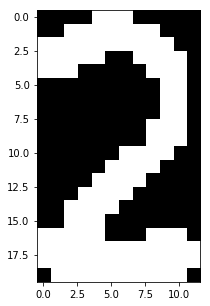

Component 20
Ratio of black pixels:  0.6630165649520489
Total number of black pixels:  19012
Number of horizontal transitions:  51.0
Number of vertical transitions:  769.0 



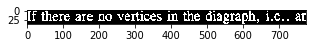

Component 21
Ratio of black pixels:  0.17221645339350264
Total number of black pixels:  22058
Number of horizontal transitions:  716.0
Number of vertical transitions:  1365.0 



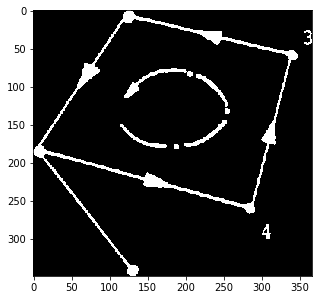

Component 22
Ratio of black pixels:  0.714940668824164
Total number of black pixels:  2651
Number of horizontal transitions:  32.0
Number of vertical transitions:  88.0 



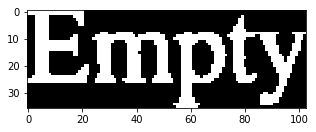

Component 23
Ratio of black pixels:  0.7407062234648442
Total number of black pixels:  7153
Number of horizontal transitions:  34.0
Number of vertical transitions:  262.0 



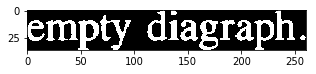

Component 24
Ratio of black pixels:  1.0
Total number of black pixels:  1
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



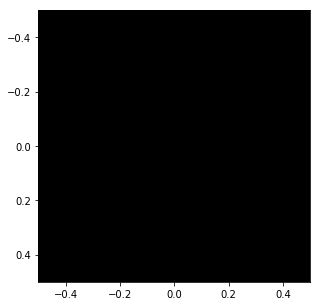

Component 25
Ratio of black pixels:  0.6599320882852292
Total number of black pixels:  19435
Number of horizontal transitions:  42.0
Number of vertical transitions:  1061.0 



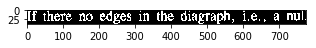

Component 26
Ratio of black pixels:  0.5834758809442354
Total number of black pixels:  3411
Number of horizontal transitions:  43.0
Number of vertical transitions:  171.0 



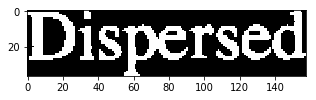

Component 27
Ratio of black pixels:  0.9107142857142857
Total number of black pixels:  51
Number of horizontal transitions:  3.0
Number of vertical transitions:  1.0 



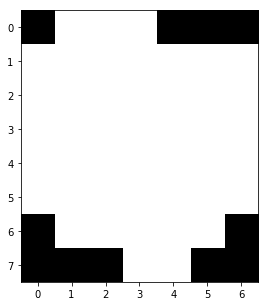

Component 28
Ratio of black pixels:  0.8461887477313974
Total number of black pixels:  9325
Number of horizontal transitions:  35.0
Number of vertical transitions:  163.0 



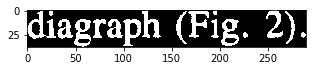

Component 29
Ratio of black pixels:  0.7484065460809647
Total number of black pixels:  17378
Number of horizontal transitions:  26.0
Number of vertical transitions:  761.0 



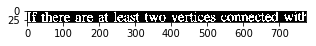

Component 30
Ratio of black pixels:  0.8
Total number of black pixels:  20
Number of horizontal transitions:  3.0
Number of vertical transitions:  2.0 



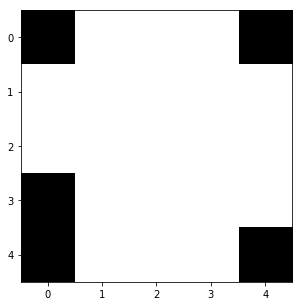

Component 31
Ratio of black pixels:  0.7639541715628673
Total number of black pixels:  5201
Number of horizontal transitions:  31.0
Number of vertical transitions:  187.0 



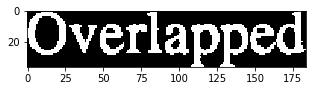

Component 32
Ratio of black pixels:  0.36153846153846153
Total number of black pixels:  94
Number of horizontal transitions:  18.0
Number of vertical transitions:  12.0 



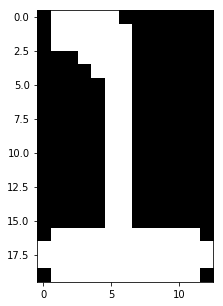

Component 33
Ratio of black pixels:  0.7832308874375721
Total number of black pixels:  8155
Number of horizontal transitions:  31.0
Number of vertical transitions:  220.0 



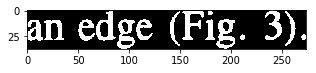

Component 34
Ratio of black pixels:  0.6324629402964776
Total number of black pixels:  18602
Number of horizontal transitions:  33.0
Number of vertical transitions:  867.0 



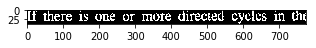

Component 35
Ratio of black pixels:  0.6161271161271161
Total number of black pixels:  4149
Number of horizontal transitions:  36.0
Number of vertical transitions:  181.0 



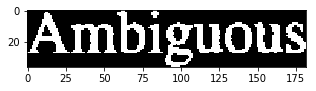

Component 36
Ratio of black pixels:  0.5219298245614035
Total number of black pixels:  119
Number of horizontal transitions:  16.0
Number of vertical transitions:  12.0 



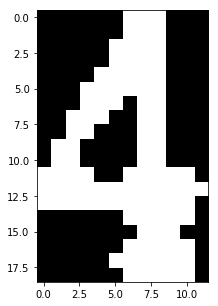

Component 37
Ratio of black pixels:  0.8430749088188535
Total number of black pixels:  9015
Number of horizontal transitions:  31.0
Number of vertical transitions:  142.0 



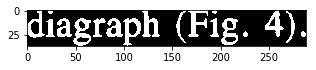

Component 38
Ratio of black pixels:  0.6329651374929512
Total number of black pixels:  19082
Number of horizontal transitions:  56.0
Number of vertical transitions:  924.0 



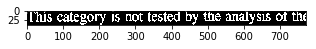

Component 39
Ratio of black pixels:  0.8
Total number of black pixels:  20
Number of horizontal transitions:  3.0
Number of vertical transitions:  3.0 



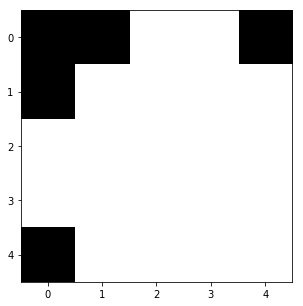

Component 40
Ratio of black pixels:  0.8814190027288514
Total number of black pixels:  3553
Number of horizontal transitions:  28.0
Number of vertical transitions:  150.0 



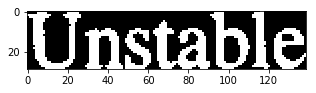

Component 41
Ratio of black pixels:  0.4880952380952381
Total number of black pixels:  123
Number of horizontal transitions:  19.0
Number of vertical transitions:  26.0 



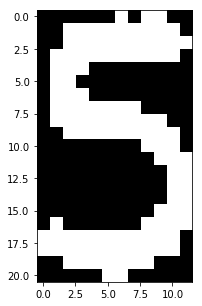

Component 42
Ratio of black pixels:  1.0
Total number of black pixels:  7
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



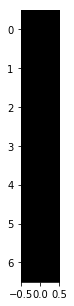

Component 43
Ratio of black pixels:  1.0
Total number of black pixels:  7
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



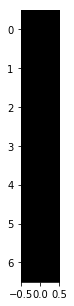

Component 44
Ratio of black pixels:  1.0
Total number of black pixels:  1
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



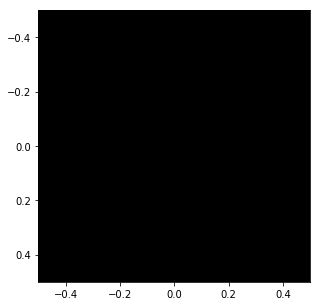

Component 45
Ratio of black pixels:  0.6384051481076061
Total number of black pixels:  19246
Number of horizontal transitions:  73.0
Number of vertical transitions:  862.0 



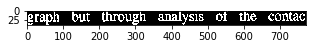

Component 46
Ratio of black pixels:  0.5707298236581284
Total number of black pixels:  17736
Number of horizontal transitions:  62.0
Number of vertical transitions:  929.0 



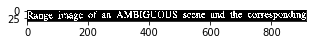

Component 47
Ratio of black pixels:  0.9375
Total number of black pixels:  15
Number of horizontal transitions:  1.0
Number of vertical transitions:  1.0 



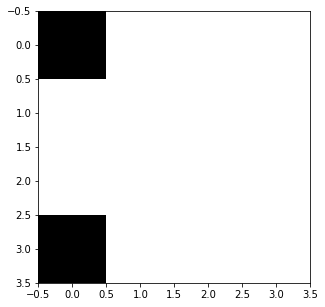

Component 48
Ratio of black pixels:  0.4292220113851992
Total number of black pixels:  1131
Number of horizontal transitions:  34.0
Number of vertical transitions:  116.0 



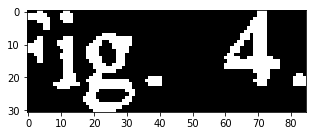

Component 49
Ratio of black pixels:  0.5821812596006144
Total number of black pixels:  1516
Number of horizontal transitions:  31.0
Number of vertical transitions:  87.0 



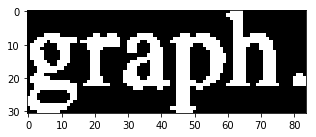

Component 50
Ratio of black pixels:  0.6805304010349289
Total number of black pixels:  21042
Number of horizontal transitions:  66.0
Number of vertical transitions:  835.0 



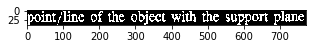

Component 51
Ratio of black pixels:  1.0
Total number of black pixels:  1
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



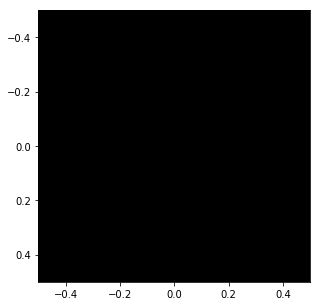

Component 52
Ratio of black pixels:  0.75
Total number of black pixels:  3
Number of horizontal transitions:  0.0
Number of vertical transitions:  1.0 



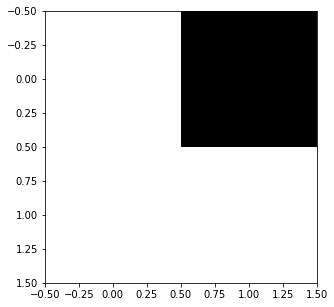

Component 53
Ratio of black pixels:  1.0
Total number of black pixels:  291
Number of horizontal transitions:  0.0
Number of vertical transitions:  0.0 



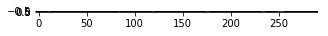

In [7]:
# 8)

X = np.zeros((num_components, 4), dtype = np.float64)

def vertical_transitions(component):
    n = component.shape[1]
    sum = 0
    for i in range(n):
        sum += (component[:-1,i] < component[1:,i]).sum()
    return sum

def horizontal_transitions(component):
    n = component.shape[0]
    sum = 0
    for i in range(n):
        sum += (component[i,:-1] < component[i,1:]).sum()
    return sum

# find all connected components
components = ndimage.find_objects(labeled_array)
# for each component
for i in range(num_components):
    component       = (labeled_array[components[i]]/(i+1)).astype(np.uint8)
    black_pixels    = np.sum(component)
    print("Component", i+1)
    print("Ratio of black pixels: ", black_pixels/component.size)
    print("Total number of black pixels: ", black_pixels,)
    X[i,0] = black_pixels
    X[i,1] = black_pixels/component.size
    X[i,2] = horizontal_transitions(component)
    X[i,3] = vertical_transitions(component)
    print("Number of horizontal transitions: ", X[i,2])
    print("Number of vertical transitions: ", X[i,3], "\n")
    display_images([image[components[i]]], [[5,5]])

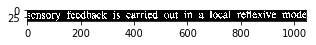

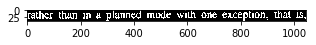

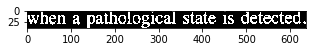

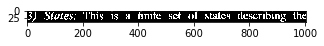

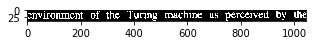

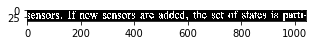

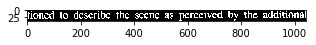

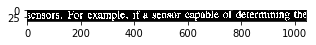

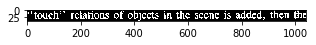

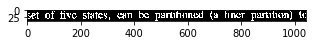

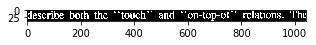

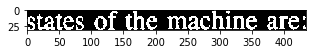

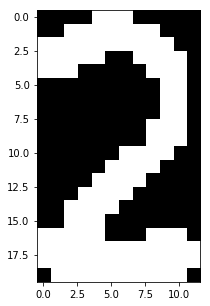

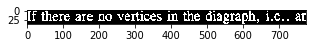

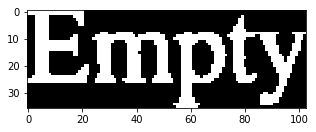

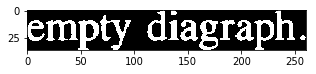

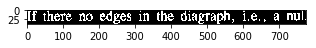

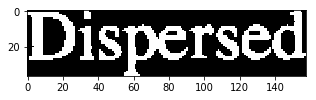

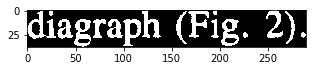

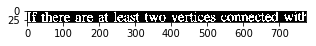

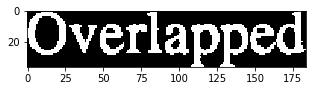

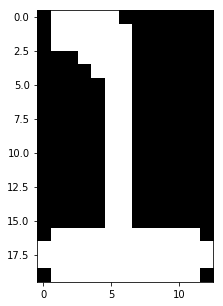

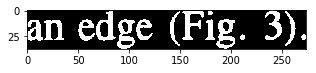

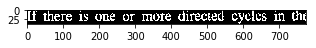

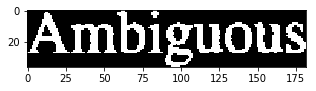

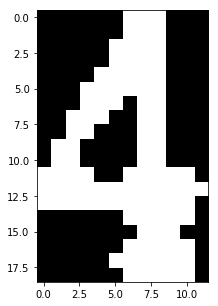

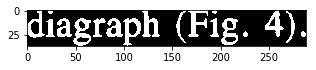

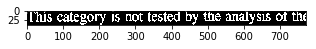

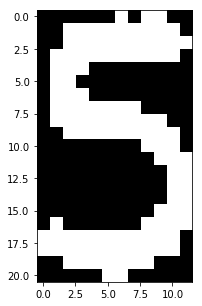

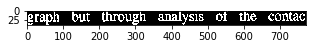

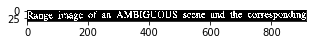

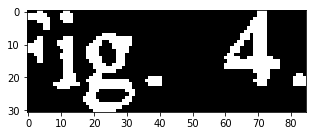

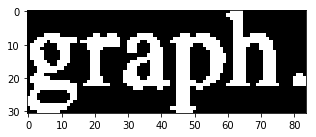

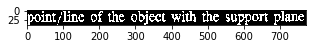

Number of text components:  34
Number of non-text components:  19


In [9]:
# 9) rule to select only text components

def rule(image, n_components, components, X):
    total = 0
    index = np.zeros(n_components, dtype=np.uint8) 
    for i in range(n_components):
        if((X[i,1] > 0.35 and X[i,1] < 0.85) and X[i,2]>=14):
            display_images([image[components[i]]], [[5,5]])
            total+=1
    return total
total = rule(image,num_components, components,X)
print("Number of text components: ", total)
print("Number of non-text components: ", num_components-total)

In [ ]:
# 10)
# load image
image   = cv2.imread("bitmap.pbm", 0)
# structuring element for erosion
struct_e = np.ones((1,8),dtype=bool)
# structuring element for dilatation
struct_d = np.ones((1,15),dtype=bool)
# turn grayscale to bunary
image_b   = grayscale_to_binary(image)
# apply dilatation
image_b = ndimage.binary_dilation(image_b, structure=struct_d).astype(np.uint8)
#image = binary_to_grayscale(image_b)
image_b = ndimage.binary_erosion(image_b, structure=struct_e).astype(np.uint8)
# find the connected components
labeled_array, num_components = ndimage.label(image_b)
print("Number of connected components: ",num_components)

In [ ]:
# 10)
# find the all components
components = ndimage.find_objects(labeled_array)
# for each component
for i in range(num_components):
    x      = components[i]
    start  = (x[0].start, x[1].start)
    end    = (x[0].stop,  x[1].stop)
    rr, cc = sk.draw.rectangle_perimeter(start, end=end, shape=image.shape)
    image[rr,cc] = 0
cv2.imwrite("image_r10.pbm", image)